# Understanding Basic Concepts of Agentic AI

## Course Overview
This notebook introduces the fundamental concepts of Agentic AI, exploring what makes AI systems "agentic" and how they differ from traditional AI models.

## Learning Objectives
- Understand what Agentic AI is and its key characteristics
- Learn about the components of an AI agent
- Explore different types of agents
- Understand the agent loop and decision-making process
- Learn about tools, actions, and observations in agentic systems


## What is Agentic AI?

**Agentic AI** refers to AI systems that can:
- **Perceive** their environment through observations
- **Reason** about what actions to take
- **Act** autonomously to achieve goals
- **Learn** from feedback and adapt their behavior

Unlike traditional AI models that simply process inputs and produce outputs, agentic AI systems are designed to operate autonomously in dynamic environments, making decisions and taking actions over time.


## Key Components of an AI Agent

An AI agent typically consists of:

1. **State/Memory**: The agent's understanding of its current situation
2. **Perception**: Ability to observe the environment
3. **Reasoning**: Decision-making capabilities (often powered by LLMs)
4. **Action**: Ability to execute actions using tools
5. **Feedback Loop**: Learning from outcomes

Let's visualize this with a simple diagram:


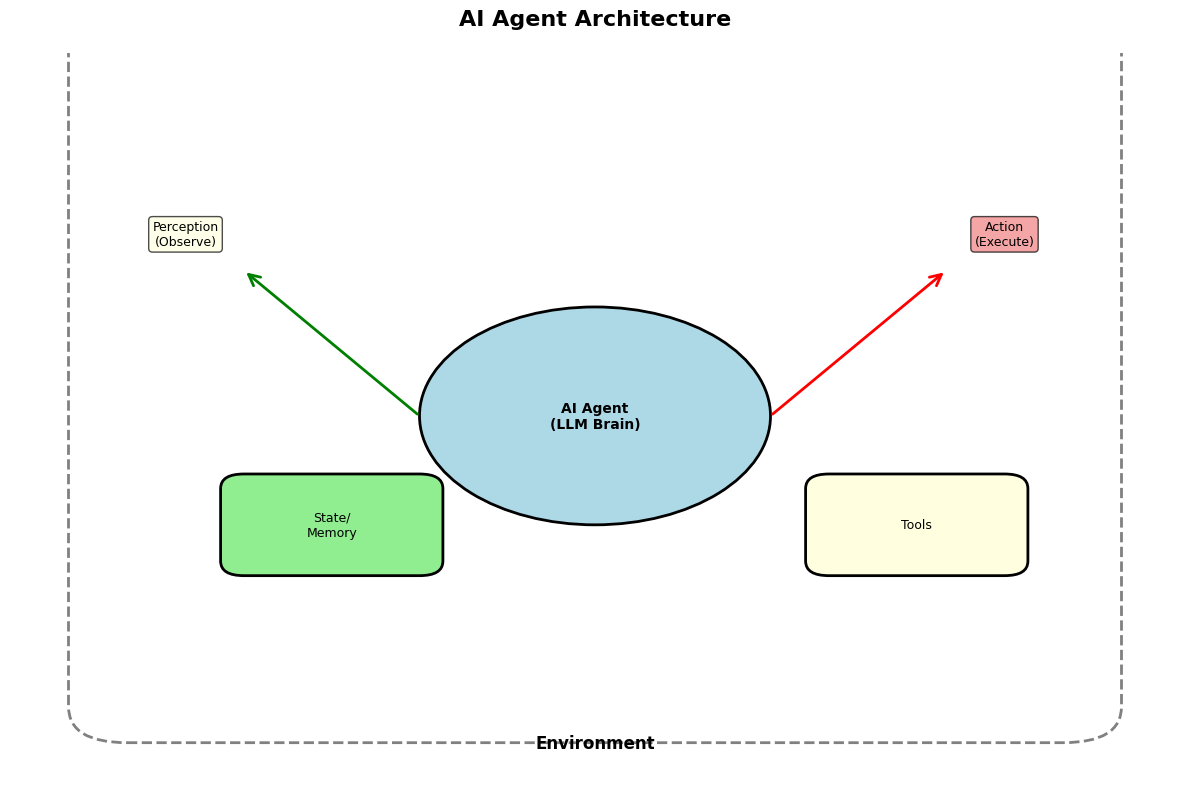

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a simple visualization of an AI Agent
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Agent core
agent_circle = plt.Circle((0.5, 0.5), 0.15, color='lightblue', ec='black', linewidth=2)
ax.add_patch(agent_circle)
ax.text(0.5, 0.5, 'AI Agent\n(LLM Brain)', ha='center', va='center', fontsize=10, weight='bold')

# State/Memory
state_box = mpatches.FancyBboxPatch((0.2, 0.3), 0.15, 0.1, 
                                     boxstyle="round,pad=0.02", 
                                     ec='black', fc='lightgreen', linewidth=2)
ax.add_patch(state_box)
ax.text(0.275, 0.35, 'State/\nMemory', ha='center', va='center', fontsize=9)

# Perception
perception_arrow = mpatches.FancyArrowPatch((0.35, 0.5), (0.2, 0.7),
                                            arrowstyle='->', mutation_scale=20, 
                                            color='green', linewidth=2)
ax.add_patch(perception_arrow)
ax.text(0.15, 0.75, 'Perception\n(Observe)', ha='center', va='center', fontsize=9, 
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# Action
action_arrow = mpatches.FancyArrowPatch((0.65, 0.5), (0.8, 0.7),
                                        arrowstyle='->', mutation_scale=20, 
                                        color='red', linewidth=2)
ax.add_patch(action_arrow)
ax.text(0.85, 0.75, 'Action\n(Execute)', ha='center', va='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Tools
tools_box = mpatches.FancyBboxPatch((0.7, 0.3), 0.15, 0.1,
                                    boxstyle="round,pad=0.02",
                                    ec='black', fc='lightyellow', linewidth=2)
ax.add_patch(tools_box)
ax.text(0.775, 0.35, 'Tools', ha='center', va='center', fontsize=9)

# Environment
env_rect = mpatches.FancyBboxPatch((0.1, 0.1), 0.8, 0.9,
                                   boxstyle="round,pad=0.05",
                                   ec='gray', fc='none', linewidth=2, linestyle='--')
ax.add_patch(env_rect)
ax.text(0.5, 0.05, 'Environment', ha='center', va='center', fontsize=12, weight='bold')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('AI Agent Architecture', fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.show()


## The Agent Loop

The core of agentic AI is the **agent loop**, which consists of:

1. **Observe**: Agent receives information about the current state
2. **Think**: Agent reasons about what to do next (using LLM)
3. **Act**: Agent executes an action using available tools
4. **Reflect**: Agent evaluates the outcome and updates its state

Let's implement a simple agent loop:


In [1]:
class SimpleAgent:
    """
    A simple demonstration of an AI agent's core loop
    """
    def __init__(self, name="Agent"):
        self.name = name
        self.state = {"observations": [], "actions": [], "goals": []}
        self.tools = {
            "search": self._search_tool,
            "calculate": self._calculate_tool,
            "store": self._store_tool
        }
    
    def _search_tool(self, query):
        """Simulated search tool"""
        return f"Search results for: {query}"
    
    def _calculate_tool(self, expression):
        """Simulated calculator tool"""
        try:
            result = eval(expression)
            return f"Result: {result}"
        except:
            return "Error: Invalid expression"
    
    def _store_tool(self, key, value):
        """Simulated storage tool"""
        self.state[key] = value
        return f"Stored {key} = {value}"
    
    def observe(self, observation):
        """Agent observes the environment"""
        self.state["observations"].append(observation)
        print(f"[{self.name}] Observing: {observation}")
        return observation
    
    def think(self, goal):
        """Agent reasons about what action to take"""
        print(f"[{self.name}] Thinking about goal: {goal}")
        
        # Simple reasoning logic (in real agents, this would use an LLM)
        if "search" in goal.lower():
            return "search", goal.replace("search", "").strip()
        elif "calculate" in goal.lower() or any(op in goal for op in ["+", "-", "*", "/"]):
            return "calculate", goal
        elif "store" in goal.lower():
            parts = goal.split()
            if len(parts) >= 3:
                return "store", (parts[1], parts[2])
        return None, None
    
    def act(self, tool_name, tool_input):
        """Agent executes an action"""
        if tool_name in self.tools:
            if isinstance(tool_input, tuple):
                result = self.tools[tool_name](*tool_input)
            else:
                result = self.tools[tool_name](tool_input)
            self.state["actions"].append((tool_name, tool_input, result))
            print(f"[{self.name}] Acting: {tool_name}({tool_input}) -> {result}")
            return result
        else:
            print(f"[{self.name}] Unknown tool: {tool_name}")
            return None
    
    def reflect(self, action_result):
        """Agent reflects on the outcome"""
        print(f"[{self.name}] Reflecting: Action completed, result: {action_result}")
        return action_result
    
    def run_loop(self, goal, observation=None):
        """Execute the complete agent loop"""
        print(f"\n{'='*50}")
        print(f"Agent Loop Execution: {goal}")
        print(f"{'='*50}\n")
        
        # 1. Observe
        if observation:
            self.observe(observation)
        
        # 2. Think
        tool_name, tool_input = self.think(goal)
        
        if tool_name:
            # 3. Act
            result = self.act(tool_name, tool_input)
            
            # 4. Reflect
            self.reflect(result)
            return result
        else:
            print(f"[{self.name}] Could not determine action for goal: {goal}")
            return None

# Example usage
agent = SimpleAgent("DemoAgent")

# Example 1: Search
agent.run_loop("search for Python tutorials", observation="User wants to learn Python")

print("\n")

# Example 2: Calculate
agent.run_loop("calculate 15 * 23 + 7", observation="User needs a calculation")

print("\n")

# Example 3: Store
agent.run_loop("store name Alice", observation="User wants to save information")

print("\n")
print("Final Agent State:")
print(agent.state)



Agent Loop Execution: search for Python tutorials

[DemoAgent] Observing: User wants to learn Python
[DemoAgent] Thinking about goal: search for Python tutorials
[DemoAgent] Acting: search(for Python tutorials) -> Search results for: for Python tutorials
[DemoAgent] Reflecting: Action completed, result: Search results for: for Python tutorials



Agent Loop Execution: calculate 15 * 23 + 7

[DemoAgent] Observing: User needs a calculation
[DemoAgent] Thinking about goal: calculate 15 * 23 + 7
[DemoAgent] Acting: calculate(calculate 15 * 23 + 7) -> Error: Invalid expression
[DemoAgent] Reflecting: Action completed, result: Error: Invalid expression



Agent Loop Execution: store name Alice

[DemoAgent] Observing: User wants to save information
[DemoAgent] Thinking about goal: store name Alice
[DemoAgent] Acting: store(('name', 'Alice')) -> Stored name = Alice
[DemoAgent] Reflecting: Action completed, result: Stored name = Alice


Final Agent State:
{'observations': ['User wants to learn

## Types of Agents

### 1. **Reactive Agents**
- Respond to current state only
- No memory of past actions
- Fast but limited

### 2. **Deliberative Agents**
- Maintain internal state
- Plan before acting
- More sophisticated but slower

### 3. **Hybrid Agents**
- Combine reactive and deliberative approaches
- Most practical for real-world applications

### 4. **Multi-Agent Systems**
- Multiple agents working together
- Can collaborate or compete
- Useful for complex tasks


In [3]:
# Example: Multi-Agent System
class MultiAgentSystem:
    def __init__(self):
        self.agents = {
            "researcher": SimpleAgent("Researcher"),
            "analyst": SimpleAgent("Analyst"),
            "writer": SimpleAgent("Writer")
        }
    
    def collaborate(self, task):
        print(f"\n{'='*60}")
        print(f"Multi-Agent Collaboration: {task}")
        print(f"{'='*60}\n")
        
        # Researcher gathers information
        research_result = self.agents["researcher"].run_loop(
            f"search for {task}", 
            observation=f"Task assigned: {task}"
        )
        
        # Analyst processes the information
        analysis_result = self.agents["analyst"].run_loop(
            f"calculate analysis of {task}",
            observation=f"Research completed: {research_result}"
        )
        
        # Writer creates output
        writer_result = self.agents["writer"].run_loop(
            f"store report {task}",
            observation=f"Analysis completed: {analysis_result}"
        )
        
        return {
            "research": research_result,
            "analysis": analysis_result,
            "report": writer_result
        }

# Example
multi_system = MultiAgentSystem()
result = multi_system.collaborate("climate change impacts")



Multi-Agent Collaboration: climate change impacts


Agent Loop Execution: search for climate change impacts

[Researcher] Observing: Task assigned: climate change impacts
[Researcher] Thinking about goal: search for climate change impacts
[Researcher] Acting: search(for climate change impacts) -> Search results for: for climate change impacts
[Researcher] Reflecting: Action completed, result: Search results for: for climate change impacts

Agent Loop Execution: calculate analysis of climate change impacts

[Analyst] Observing: Research completed: Search results for: for climate change impacts
[Analyst] Thinking about goal: calculate analysis of climate change impacts
[Analyst] Acting: calculate(calculate analysis of climate change impacts) -> Error: Invalid expression
[Analyst] Reflecting: Action completed, result: Error: Invalid expression

Agent Loop Execution: store report climate change impacts

[Writer] Observing: Analysis completed: Error: Invalid expression
[Writer] Thinking ab

## Key Concepts Summary

### 1. **Autonomy**
Agents operate independently without constant human intervention.

### 2. **Reactivity**
Agents respond to changes in their environment.

### 3. **Proactiveness**
Agents can take initiative to achieve goals.

### 4. **Social Ability**
Agents can interact with other agents or humans.

### 5. **Tool Use**
Agents can use external tools to extend their capabilities.

## Real-World Applications

- **Customer Service Bots**: Handle inquiries autonomously
- **Code Generation Agents**: Write and debug code
- **Research Assistants**: Gather and synthesize information
- **Workflow Automation**: Execute complex business processes
- **Personal Assistants**: Manage tasks and schedules

## Next Steps

In the next notebook, we'll explore how Large Language Models (LLMs) power the reasoning capabilities of AI agents, using Hugging Face to understand and work with these models.


## Exercises

1. **Extend the SimpleAgent class**: Add a new tool (e.g., "translate" or "summarize")
2. **Implement a memory system**: Modify the agent to remember past interactions
3. **Create a goal-oriented agent**: Design an agent that can break down complex goals into sub-goals
4. **Build a reactive agent**: Create an agent that only responds to the current state without memory

Try implementing these exercises to deepen your understanding!
